# Project 4 -- Zeru Zhou

**TA Help:** NA


    
**Collaboration:** NA
    
- Get help from piazza
- Get help from videos provided by Dr. Ward

## Question 1

In [4]:
Dataframe <- read.csv("/depot/datamine/data/olympics/athlete_events.csv")

In [2]:
dim(Dataframe)

[1] 271116     15

In [3]:
table(Dataframe$Medal, useNA = "always")


Bronze   Gold Silver   <NA> 
 13295  13372  13116 231333 

In [4]:
prop.table(table(Dataframe$Medal, useNA = "always"))


    Bronze       Gold     Silver       <NA> 
0.04903805 0.04932206 0.04837782 0.85326207 

As the results above, there are 85.326% of athletes in olympics do not have a medal.

## Question 2

In [5]:
Dataframe$won_medal <- TRUE

In [10]:
Dataframe$won_medal[is.na(Dataframe$Medal)] <- FALSE

In [11]:
head(Dataframe)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,won_medal
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA,FALSE
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA,FALSE
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA,FALSE
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,TRUE
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA,FALSE
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA,FALSE


Indicator "won_medal" is added in dataframe. When no medal earned, the result is False; When medal is earned, the result is TRUE.

## Question 3

In [2]:
sum(is.na(Dataframe$Age))

[1] 9474

In [3]:
Dataframe$age_cat <- NA

In [4]:
Dataframe$age_cat[Dataframe$Age < 18] <- "youth"

In [5]:
Dataframe$age_cat[(Dataframe$Age <= 25) & (Dataframe$Age >=18)] <- "young adult"

In [6]:
Dataframe$age_cat[(Dataframe$Age <= 35) & (Dataframe$Age >=26)] <- "adult"

In [7]:
Dataframe$age_cat[(Dataframe$Age <= 55) & (Dataframe$Age >=36)] <- "middle age adult"

In [8]:
Dataframe$age_cat[Dataframe$Age > 55] <- "wise adult"

In [9]:
head(Dataframe)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,age_cat
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA,young adult
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA,young adult
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA,young adult
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,adult
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA,young adult
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA,young adult


In [10]:
table(Dataframe$age_cat, useNA = "always")


           adult middle age adult       wise adult      young adult 
           94417            15355             1029           138333 
           youth             <NA> 
           12508             9474 

As Dr. Ward posted on piazza, we can use individual statement here in this question since for/if else are not good ways in R. Outputs are listed above, and there are 138333 athletes are "young adults".

## Question 4

In [5]:
Dataframe$age_cat_cut <- cut(Dataframe$Age, breaks = c(0,17,25,35,55,Inf), labels=c("youth","young adult","adult","middle age adult","wise adult"))

In [6]:
table(Dataframe$age_cat_cut, useNA = "always")


           youth      young adult            adult middle age adult 
           12508           138333            94417            15355 
      wise adult             <NA> 
            1029             9474 

We use cut function here to solve problem 3. The result is the same. There are 138333 athletes are "young adults".

## Question 5

In [7]:
prop.table(table(Dataframe$age_cat_cut[is.na(Dataframe$Medal)== FALSE]))


           youth      young adult            adult middle age adult 
     0.030191288      0.509180303      0.401193311      0.057207242 
      wise adult 
     0.002227856 

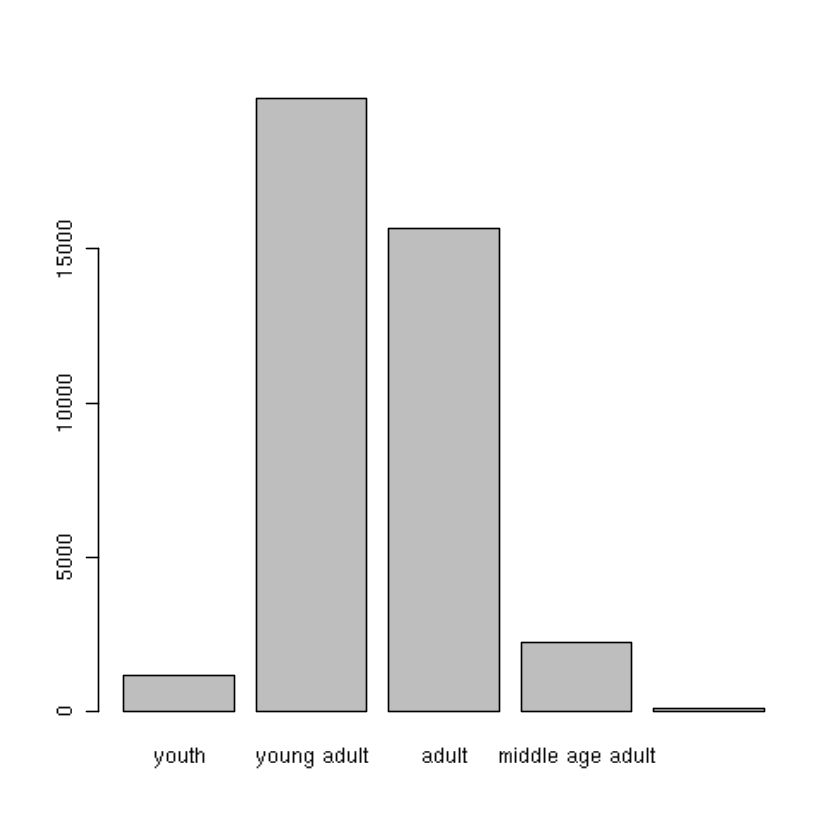

In [9]:
barplot(table(Dataframe$age_cat_cut[is.na(Dataframe$Medal)== FALSE]))

I draw the table with proportions and barplot by breaking them into different age groups then select people who win a medal from them. As a result, I get a table of people who win a medal with different age intervals, labelled as barplot above. 
From barplot, there are around 20000 young adults and 15000 adults won a medal, but there are only less than 5000 medals earned by youth, middle age adult, or wise adult. As a result, young adults(18-25 years old) won most medals, wise adults(more than 55 years old) won least medals. There is association between age and winning a medal.
Also, from table with proportions of those who won a medal, more than 50% of them are young adults, 40% of them are adults, and only 0.2% of them are wise adults. So there is association exists. 
According to the barplot and table with proportions, there is some association between age and winning a medal. Young adults(18-25 years old) won most medals, wise adults(more than 55 years old) won least medals.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.